<a href="https://colab.research.google.com/github/mondtorsha/DSBA-INTERN-at-TSF/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation**
# *Name- Torsha Mondal* 

# **Task 1 : Prediction Using Supervised Machine Learning**

This regression task to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
#import  some of the necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
# reading the data from remote link
s_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Data Visualiztion I**

To understand the relation between the two variables the data is visualized  by plotting them in a 2-D graph 

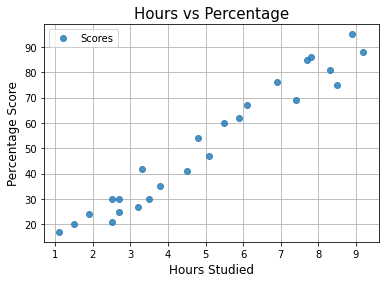

In [ ]:
# Plotting the data
s_data.plot(x='Hours', y='Scores', style='o', alpha=0.8)  
plt.title('Hours vs Percentage', size=15)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Percentage Score', size=12)
plt.grid(True)  
plt.show()

**From the graph above, it can be clearly observe that there is a positive linear relation between the number of hours studied and percentage of score.**

# **Pre-Processing the data**
 To pre-process the data for training and testing.

**Firstly**, the data is divided in two parts namely- X as input (feature) and y as output (target)
 
**Secondly**, they are then split in to train, test modules. 



In [ ]:
# pre-process the data
X = s_data.iloc[:, :1].values
y = s_data.iloc[:, -1].values


In [ ]:
# Spliting the data into 80% for training and 20% for testing  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)


# **Training the Model**

A Simple Linear Regression Model is chosen for training after observing the trend of the data. 


In [ ]:
# training the model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'. format(linreg.intercept_))

print("Training complete.")

linear model coeff (w): [9.91065648]
linear model intercept (b): 2.018
Training complete.


# **Data Visualization II**

To observe how well the model fits the training data we plot the regression model on the  given data.

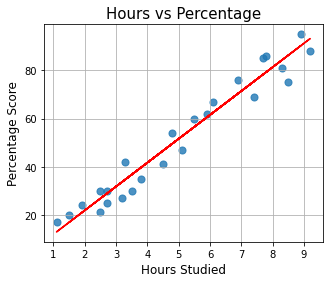

In [ ]:
#plotting the regression model
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker='o', alpha=0.8, s=50)
plt.plot(X, linreg.coef_*X+ linreg.intercept_, 'r-')
plt.title('Hours vs Percentage', size=15)  
plt.xlabel('Hours Studied', size=12)  
plt.ylabel('Percentage Score', size=12)
plt.grid(True)  
plt.show()



**The Linear Regression Model fits the data satisfactorily.**

## **Making Prediction**

The model  is now used for making predictions.

In [ ]:
print(X_test) # test data
y_pred=linreg.predict(X_test) # making Prediction


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Compare Actual vs Predict
df=pd.DataFrame({"Actual": y_test, "Predict": y_pred})
df

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Evaluating the Model**

For evaluating the model's prediction three evaluating metrices are used namely:


*   mean_absolute_error (absolute difference of target & predicted values)
*   mean_squared_error (squared difference of target & predicted values)


*   R2 score (computes how well future instances will be predicted), 
best possible score: 1.0 and constant possible score: 0.0








In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

Mean Absolute Error: 4.18
Mean Squared Error: 21.60
R-squared score (training): 0.952
R-squared score (test): 0.945


**Hence as the R-squared score of both the training and testing model is near to the best value: 1.0 so it can be concluded that the model fits  very well to the data.**

# **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
#predicting  score
hours=[9.25]
own_data=linreg.predict([hours])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {:.3f}".format(own_data[0]))

No. of Hours = [9.25]
Predicted Score = 93.692


**Thus, the predicted score for a student studing for 9.25hrs/day is 93.692.**